# Observations 

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [3]:
#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
combined_data_df.head()

#Check the rows of Combined_data_df
mouse_count = combined_data_df["Mouse ID"].count()
mouse_count

#Check the mouse count of Combined_data_df
mouse_count = combined_data_df["Mouse ID"].unique()
len(mouse_count)

#Get rid of af any mouse ID with duplicate time points
#g989 is the mouse ID with duplicated time points, need to remove g989 from the dataset
clean_combined_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989", :]
clean_combined_data_df.head()

#Check the rows after we deleted rows with g989 (13 rows to be specific)
#The row should now be 13 rows less the previous mouse count number
mouse_count = clean_combined_data_df["Mouse ID"].count()
mouse_count

#Check the mouse count of Combined_data_df
#The mouse count should now be 1 less the previous mouse count number
mouse_count = clean_combined_data_df["Mouse ID"].unique()
len(mouse_count)

248

# Summary Statistics

In [6]:
#Obtain the Summary satistics table: mean, median, variance, standard deviation, and SEM of tumor volume for each drug regimen

#Indicate the drug regimen dataset
clean_combined_data_df.groupby("Drug Regimen")

#Process the statistics for Drug Regimen:
mean = clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

median = clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

variance = clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance

std_deviation = clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_deviation

sem = clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem

statistics_summary_df = pd.DataFrame({"Mean" : mean, 
                                     "Median" : median,
                                     "Variance" : variance,
                                     "Standard Deviation" : std_deviation,
                                     "SEM" : sem})
statistics_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

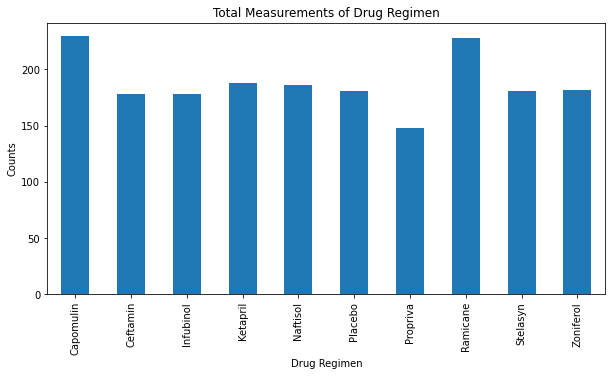

<Figure size 432x288 with 0 Axes>

In [7]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas (Total Counts)

#Process the panda code for total number of measurements/ total counts for each drug regimen
total_counts = clean_combined_data_df.groupby("Drug Regimen")["Mouse ID"].count()
total_counts

#Use DataFrame.plot() in order to create a bar chart of the data
total_counts.plot(kind="bar", figsize=(10,5))

#Set title and labels
plt.title("Total Measurements of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

plt.show()
plt.tight_layout()

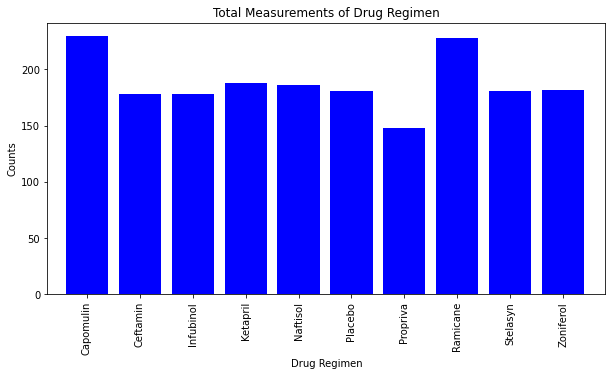

<Figure size 432x288 with 0 Axes>

In [8]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Process the pyplot code for total number of measurements/ total counts for each drug regimen
total_counts = (230, 178, 178, 188, 186, 181, 148, 228, 181, 182)
x_axis = np.arange(len(total_counts))
y_axis = [0, 50, 100, 150, 200, 250]
tick_locations = [value for value in x_axis]

#Plot bar plot 
plt.figure(figsize=(10, 5))
plt.bar(x_axis, total_counts, color='blue', alpha=1, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=90)

#Add title and labels
plt.title("Total Measurements of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

#Set the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.20)
                   
plt.show()
plt.tight_layout()

Text(0, 0.5, '-')

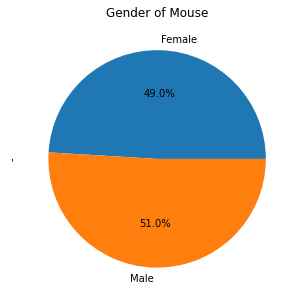

In [9]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
    
#Process the pandas code
gender_of_mouse = clean_combined_data_df.groupby("Sex")["Mouse ID"].count()
gender_of_mouse

#Use DataFrame.plot() in order to create a pie plot of the data
gender_of_mouse.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%')

#Set title and label
plt.title("Gender of Mouse")
plt.ylabel('-')


([<matplotlib.patches.Wedge at 0x1dbc76b6a90>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

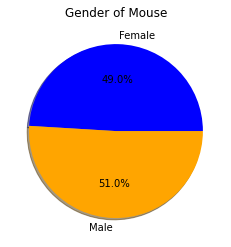

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot the pie plot and set title and label
labels = ["Female", "Male"]
sizes = [922, 958]
colors = ["blue", "orange"]
plt.title("Gender of Mouse")

#Use Matplotlib pyplot in order to create a pie plot of the data
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

# Quartiles, Outliers and Boxplots


In [11]:
#Calculate the final tumor volume of each mouse across these four drug regimen: Capomulin, Ramicane, Infubinol, and Ceftamin

#Create empty list to fill
indicies = []

#Process the code to find the "Final" tumor volume for each Mouse
for _, current in clean_combined_data_df.groupby(["Mouse ID"]):
    timepoint = current["Timepoint"].max()
    indicies.append(current[current["Timepoint"] == timepoint].index[0])
    
final_tumor_vol_df = clean_combined_data_df.loc[indicies]
final_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [12]:
#Create each 4 drugs into it's on Dataset

columns = ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
Capomulin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Capomulin", columns]
Capomulin_df.head()

columns = ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
Ramicane_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ramicane", columns]
Ramicane_df.head()

columns = ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
Infubinol_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Infubinol", columns]
Infubinol_df.head()

columns = ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Mouse ID"]
Ceftamin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ceftamin", columns]
Ceftamin_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3),Mouse ID
493,Ceftamin,45,62.999356,a275
594,Ceftamin,0,45.000000,b447
600,Ceftamin,25,56.057749,b487
617,Ceftamin,30,55.742829,b759
840,Ceftamin,15,48.722078,f436


In [13]:
#Merge all individual Drug (4) Dataset into One Whole Dataset

#Merge the first two datasets (Capomulin & Ramicane) on "Drug Regimen" so that no data is lost
combined_drug_df = pd.merge(Capomulin_df, Ramicane_df, how='outer', on=None)
combined_drug_df.head()

#Merge our newly combined datasets with Infubinol dataframe
combined_drug_df = pd.merge(combined_drug_df, Infubinol_df, how='outer', on=None)
combined_drug_df

#Merge our newly combined datasets with Ceftamin dataframe
combined_drug_df = pd.merge(combined_drug_df, Ceftamin_df, how='outer', on=None)
combined_drug_df

#Indicate the tumor volume of all 4 drugs
final_tumor_vol_df = combined_drug_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
final_tumor_vol_df = final_tumor_vol_df["Tumor Volume (mm3)"]
final_tumor_vol_df.head()

38    22.050126
16    23.343598
11    28.430964
23    28.484033
33    29.128472
Name: Tumor Volume (mm3), dtype: float64

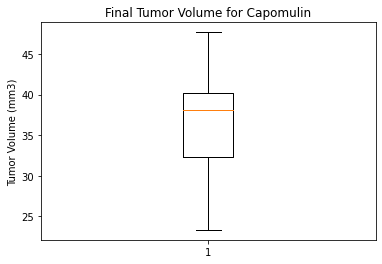

The lower quartile of volume is: 32.37735684
The upper quartile of volume is: 40.1592203
The interquartile range of volume is: 7.781863460000004
The the median of volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [14]:
#Calculate the CAPOMULIN IQR and quantitatively determine if there are any potential outliers. 

#Dataset used
Capo = Capomulin_df["Tumor Volume (mm3)"]

#Plot the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Capo)
plt.show()

#Quartile calculations

#Dataset used
Capo = Capomulin_df["Tumor Volume (mm3)"]

#Equation and calculation of the box plot
quartiles = Capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

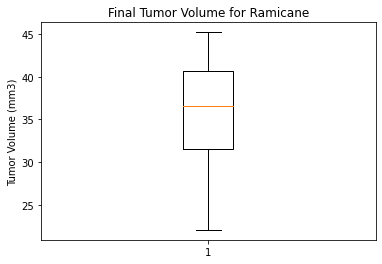

The lower quartile of volume is: 31.56046955
The upper quartile of volume is: 40.65900627
The interquartile range of volume is: 9.098536719999998
The the median of volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [15]:
#Calculate the RAMICANE IQR and quantitatively determine if there are any potential outliers. 

#Dataset used
Rami = Ramicane_df["Tumor Volume (mm3)"]

#Plot the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Rami)
plt.show()

#Quartile calculations

##Dataset used
Rami = Ramicane_df["Tumor Volume (mm3)"]

#Equation and calculation of the box plot statistically 
quartiles = Rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

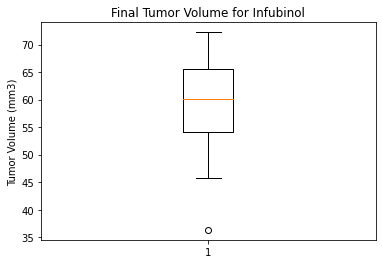

The lower quartile of volume is: 54.04860769
The upper quartile of volume is: 65.52574285
The interquartile range of volume is: 11.477135160000003
The the median of volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [16]:
#Calculate the INFUBINOL IQR and quantitatively determine if there are any potential outliers. 

#Dataset used
Infu = Infubinol_df["Tumor Volume (mm3)"]

#Plot the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Infu)
plt.show()

#Quartile calculations

#Dataset used
Infu = Infubinol_df["Tumor Volume (mm3)"]

#Equation and calculation of the box plot statistically 
quartiles = Infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

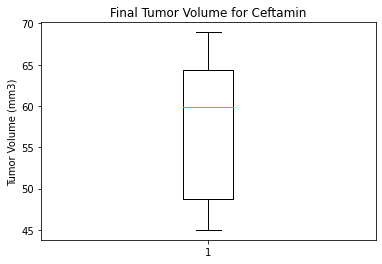

The lower quartile of volume is: 48.72207785
The upper quartile of volume is: 64.29983003
The interquartile range of volume is: 15.577752179999997
The the median of volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [17]:
#Calculate the CEFTAMIN IQR and quantitatively determine if there are any potential outliers. 

#Dataset used
Ceft = Ceftamin_df["Tumor Volume (mm3)"]

#Plot the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Ceft)
plt.show()

#Quartile calculations

#Dataset used
Ceft = Ceftamin_df["Tumor Volume (mm3)"]

#Equation and calculation of the box plot statistically 
quartiles = Ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

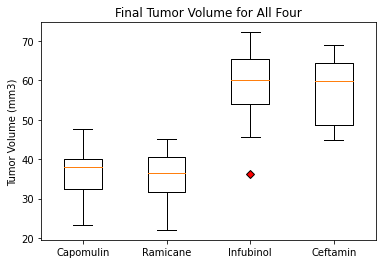

In [18]:
#The dataset used so we can put 4 drugs  regimens together to plot them in one frame
four_treatment_regimens = [Capo, Rami, Infu, Ceft]
four_treatment_regimens

names = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Plot the 4 box plot into one frame
red_diamond = dict(markerfacecolor="r", marker="D")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for All Four')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(names)
ax1.boxplot([Capo, Rami, Infu, Ceft], flierprops = red_diamond)
plt.show()

# Line and Scatter Plots

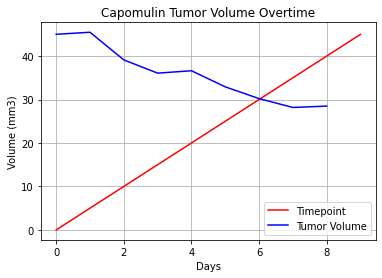

In [19]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#The dataset use
clean_combined_data_df.head()

#The code to get Capomulin data only
capo_only = clean_combined_data_df.loc[clean_combined_data_df["Drug Regimen"] == "Capomulin"]
capo_only.head()

#The code use to focus on one mouse only
capo_mouse_x401_df = clean_combined_data_df.loc[clean_combined_data_df["Mouse ID"] == "x401"]
capo_mouse_x401_df.head()

#Plotting the line plot

# Create the X and Y axis lists
timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tumor_volume = [45.000000, 45.473753, 39.113891, 36.065835, 36.617120, 32.915292, 30.206825, 28.167397, 28.484033] 

# Plot the charts and apply some styling
timepoint, = plt.plot(timepoint, color="red", label="Timepoint")
tumor_volume, = plt.plot(tumor_volume, color="blue", label="Tumor Volume")
                    
# Add title and labels
plt.title("Capomulin Tumor Volume Overtime")
plt.xlabel("Days")
plt.ylabel("Volume (mm3)")

# Create a legend for the chart
plt.legend(handles=[timepoint, tumor_volume], loc="best")

# Add in a grid for the chart
plt.grid()

plt.show()

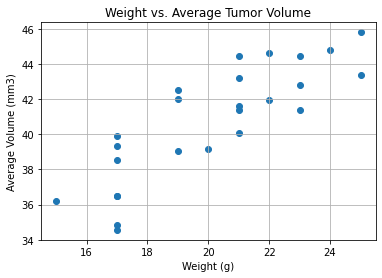

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Indicate which dataframe I'm using
capo_only.head()
#len(capo_only)

#Focus on the only 3 rows
capo_weight_df = capo_only.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)" ]]
capo_weight_df.head()

#Calculate average tumor volume for each mouse
average_volume = pd.DataFrame(capo_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_volume.head()

#Rename the Tumor volume to Average volume
average_volume = average_volume.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_volume.head()

#Generate a scatter plot of year versus violent crime rate
weight = average_volume.iloc[:,1]
tumor_volume = average_volume.iloc[:,2]
plt.scatter(weight,tumor_volume)

#Add title and label
plt.title('Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')

plt.grid()
plt.show()
plt.tight_layout()

# Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


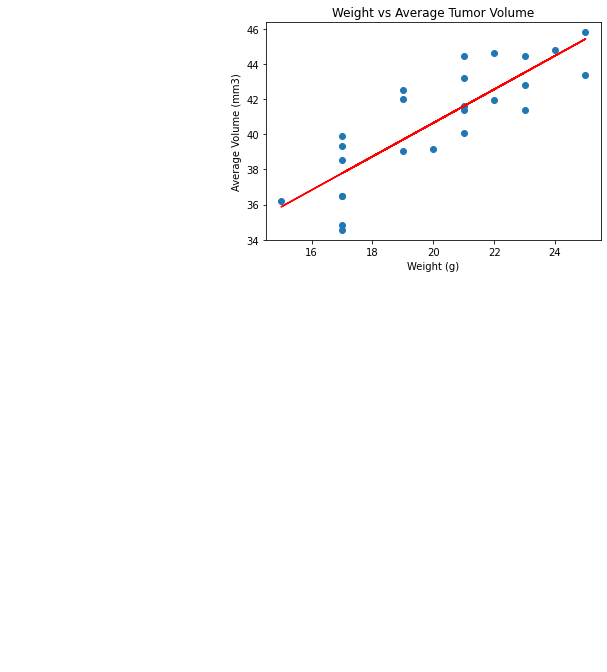

In [21]:
#Calculate the correlation coefficient and linear regression model # for mouse weight and average tumor volume for the Capomulin regimen

#Indicate the x and y values
weight = average_volume.iloc[:,1]
tumor_volume = average_volume.iloc[:,2]

#Indicate the correlation equation
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


#Add the linear regression equation and line to scatter plot

#Indicate the x and y values
x_values = average_volume.iloc[:,1]
y_values = average_volume.iloc[:,2]

#Creating linear regression by using y-intercept equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#The liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#label the scatter plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.title("Weight vs Average Tumor Volume")

print(f"The r-squared is: {rvalue**2}")
plt.show()